#### IMPORTATION DES PACKAGES
#### EXPLORATION DES DONNEES
#### DATA PRE-PROCESSING
#### MODEL

### courses.csv
File contains the list of all available modules and their presentations. The columns are:
code_module – code name of the module, which serves as the identifier.
code_presentation – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
length - length of the module-presentation in days.
The structure of B and J presentations may differ and therefore it is good practice to analyse the B and J presentations separately. Nevertheless, for some presentations the corresponding previous B/J presentation do not exist and therefore the J presentation must be used to inform the B presentation or vice versa. In the dataset this is the case of CCC, EEE and GGG modules.
### assessments.csv
This file contains information about assessments in module-presentations. Usually, every presentation has a number of assessments followed by the final exam. CSV contains columns:
code_module – identification code of the module, to which the assessment belongs.
code_presentation - identification code of the presentation, to which the assessment belongs.
id_assessment – identification number of the assessment.
assessment_type – type of assessment. Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
date – information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
weight - weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.
If the information about the final exam date is missing, it is at the end of the last presentation week.
### vle.csv
The csv file contains information about the available materials in the VLE. Typically these are html pages, pdf files, etc. Students have access to these materials online and their interactions with the materials are recorded. The vle.csv file contains the following columns:
id_site – an identification number of the material.
code_module – an identification code for module.
code_presentation - the identification code of presentation.
activity_type – the role associated with the module material.
week_from – the week from which the material is planned to be used.
week_to – week until which the material is planned to be used.
### studentInfo.csv
This file contains demographic information about the students together with their results. File contains the following columns:
code_module – an identification code for a module on which the student is registered.
code_presentation - the identification code of the presentation during which the student is registered on the module.
id_student – a unique identification number for the student.
gender – the student’s gender.
region – identifies the geographic region, where the student lived while taking the module-presentation.
highest_education – highest student education level on entry to the module presentation.
imd_band – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
age_band – band of the student’s age.
num_of_prev_attempts – the number times the student has attempted this module.
studied_credits – the total number of credits for the modules the student is currently studying.
disability – indicates whether the student has declared a disability.
final_result – student’s final result in the module-presentation.
### studentRegistration.csv
This file contains information about the time when the student registered for the module presentation. For students who unregistered the date of unregistration is also recorded. File contains five columns:
code_module – an identification code for a module.
code_presentation - the identification code of the presentation.
id_student – a unique identification number for the student.
date_registration – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
date_unregistration – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.
### studentAssessment.csv
This file contains the results of students’ assessments. If the student does not submit the assessment, no result is recorded. The final exam submissions is missing, if the result of the assessments is not stored in the system. This file contains the following columns:
id_assessment – the identification number of the assessment.
id_student – a unique identification number for the student.
date_submitted – the date of student submission, measured as the number of days since the start of the module presentation.
is_banked – a status flag indicating that the assessment result has been transferred from a previous presentation.
score – the student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.
### studentVle.csv
The studentVle.csv file contains information about each student’s interactions with the materials in the VLE. This file contains the following columns:
code_module – an identification code for a module.
code_presentation - the identification code of the module presentation.
id_student – a unique identification number for the student.
id_site - an identification number for the VLE material.
date – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
sum_click – the number of times a student interacts with the material in that day.

## PROBLEME D'APPRENTISSAGE
Ici c'est un problème de regression car on essaye de prédire le score final d'un apprenant. 

## EXPLORATION DES DONNEES
Ici je vais essayer de voir de quoi les datas sont constitués pour enfin me situer dans le problème

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

En première lieu je vais mettre toutes les tables ensemble en utilisant un dictionnaire avec comme clé le nom du fichier et valeur la lecture du fichier comme dataframe

In [25]:
# csv_path = 'Data/'
# data_dicts = {csv_name[:-4]: pd.read_csv(csv_path+csv_name) for csv_name in os.listdir(csv_path)}

In [26]:
# data_dicts['assessments']

Lecture des fichiers

In [27]:
df_evaluation = pd.read_csv('Data/assessments.csv')
df_cours = pd.read_csv('Data/courses.csv')
df_evaluationEtu = pd.read_csv('Data/studentAssessment.csv')
df_infoEtud = pd.read_csv('Data/studentInfo.csv')
df_enregistrementEtu = pd.read_csv('Data/studentRegistration.csv')
df_virLearnEnvEtu = pd.read_csv('Data/studentVle.csv')
df_virLearnEnv = pd.read_csv('Data/vle.csv')

In [28]:
df_evaluation

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


En essayant de voir toutes les tables il n'ya que les tables df_evaluationEtu et df_virLearnEnvEtu qui nous interessent ici

In [29]:
#df_evaluationEtu = df_evaluationEtu[df_evaluationEtu['date_submitted']<=180]

In [30]:
df_evaluationEtu = pd.merge(df_evaluationEtu,df_evaluation, on = ['id_assessment'])
df_evaluationEtu

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [31]:
df_virLearnEnvEtu = df_virLearnEnvEtu[df_virLearnEnvEtu['date']<=180]

In [32]:
df_virLearnEnvEtu = df_virLearnEnvEtu.drop(['date','id_site'], axis=1)

In [33]:
df_virLearnEnvEtu= df_virLearnEnvEtu.groupby(['code_module','code_presentation','id_student']).sum().reset_index()
df_virLearnEnvEtu

,code_module,code_presentation,id_student,sum_click
0,AAA,2013J,11391,713
1,AAA,2013J,28400,1121
2,AAA,2013J,30268,281
3,AAA,2013J,31604,1730
4,AAA,2013J,32885,863
...,...,...,...,...
29215,GGG,2014J,2640965,41
29216,GGG,2014J,2645731,653
29217,GGG,2014J,2648187,215
29218,GGG,2014J,2679821,275


Ici je vais essayer de joindre les deux tables concernant les etudiants df_evaluationEtu et df_virLearnEnvEtu

In [34]:
comb_data = pd.merge(df_evaluationEtu,df_virLearnEnvEtu, on =['id_student','code_module','code_presentation'])

In [35]:
comb_data

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,sum_click
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0,713
1,1753,11391,53,0,85.0,AAA,2013J,TMA,54.0,20.0,713
2,1754,11391,115,0,80.0,AAA,2013J,TMA,117.0,20.0,713
3,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0,713
4,1756,11391,212,0,82.0,AAA,2013J,TMA,215.0,30.0,713
...,...,...,...,...,...,...,...,...,...,...,...
173700,37439,573320,227,0,80.0,GGG,2014J,CMA,229.0,0.0,22
173701,37440,573320,227,0,100.0,GGG,2014J,CMA,229.0,0.0,22
173702,37441,573320,227,0,100.0,GGG,2014J,CMA,229.0,0.0,22
173703,37442,573320,227,0,20.0,GGG,2014J,CMA,229.0,0.0,22


In [36]:
comb_data = comb_data.drop(['date','weight'],axis=1)

Affichage des lignes maquantes

In [37]:
comb_data.isnull().sum()

id_assessment          0
id_student             0
date_submitted         0
is_banked              0
score                172
code_module            0
code_presentation      0
assessment_type        0
sum_click              0
dtype: int64

In [38]:
comb_data=comb_data.dropna()

In [39]:
comb_data.isnull().sum()

id_assessment        0
id_student           0
date_submitted       0
is_banked            0
score                0
code_module          0
code_presentation    0
assessment_type      0
sum_click            0
dtype: int64

In [40]:
df_infoEtud

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


On va maintenant combiner comb_data et df_infoEtud

In [41]:
df_final=pd.merge(df_infoEtud,comb_data, on =['code_module','code_presentation','id_student'])
df_final

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score,assessment_type,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0,TMA,713
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0,TMA,713
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0,TMA,713
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755,164,0,85.0,TMA,713
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756,212,0,82.0,TMA,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173528,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37437,169,0,60.0,TMA,530
173529,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37438,73,0,100.0,CMA,530
173530,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37439,150,0,60.0,CMA,530
173531,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,N,Distinction,37440,172,0,100.0,CMA,530


Ici on remarque qu'il y'a que les colonnes id_assesment et date_submitted pour differencier les lignes

In [42]:
df_final.id_assessment.nunique()

188

Avec seulement 188 element on pourra encoder id_assesment comme etant donnée categorielle

In [43]:
df_final=df_final.drop(['imd_band'], axis=1)

In [44]:
df_final.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'sum_click'],
      dtype='object')

Avec ce dataset on remarque qu'on peut eleminer la colonne id_student

In [45]:
df_final=df_final.drop(['id_student'], axis=1)

In [46]:
df_final.isnull().sum()

code_module             0
code_presentation       0
gender                  0
region                  0
highest_education       0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
id_assessment           0
date_submitted          0
is_banked               0
score                   0
assessment_type         0
sum_click               0
dtype: int64

### Encodage de Données

In [47]:
df_final.columns

Index(['code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'id_assessment',
       'date_submitted', 'is_banked', 'score', 'assessment_type', 'sum_click'],
      dtype='object')

Il y'a beaucoup de colonnes categorielles ici

In [48]:
categorical = ['code_module', 'code_presentation', 'gender', 'region','highest_education', 'age_band','disability', 'final_result','id_assessment','assessment_type']

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

Ici on souhaite utiliser l'encodage oneHot

In [50]:
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [51]:
preprocessor = make_column_transformer((categorical_pipeline,categorical))

### Modeling

Pour plus de faciliter dans le processus on souhaite utiliser la methode de pipeline

In [52]:
model = make_pipeline(preprocessor, DecisionTreeRegressor(splitter='best',criterion='squared_error'))
params = {'decisiontreeregressor__min_samples_split': [2,20],
            'decisiontreeregressor__max_depth' : [1,50],
            # 'decisiontreeregressor__splitter' : ['best','random'],
          # 'decisiontreeregressor__criterion' : ['absolute_error','squared_error']
         }

grid = GridSearchCV(model, param_grid = params, cv=4)


#### Modèle
    Le modèle utilisé ici est l'arbre de decision regressor
    Modèle: DecisionTreeRegressor()
    Paramètres à apprendre de manière optimale: Les branches gauche et droite des noeuds
    Hyper-paramètres: les paramètres de DecisionTreeRegressor(): splitter,criterion, etc.
    Critères d'optimisation: Erreur
    Methode d'optimisation: squared_error
    Methode d'inference: la methode predict

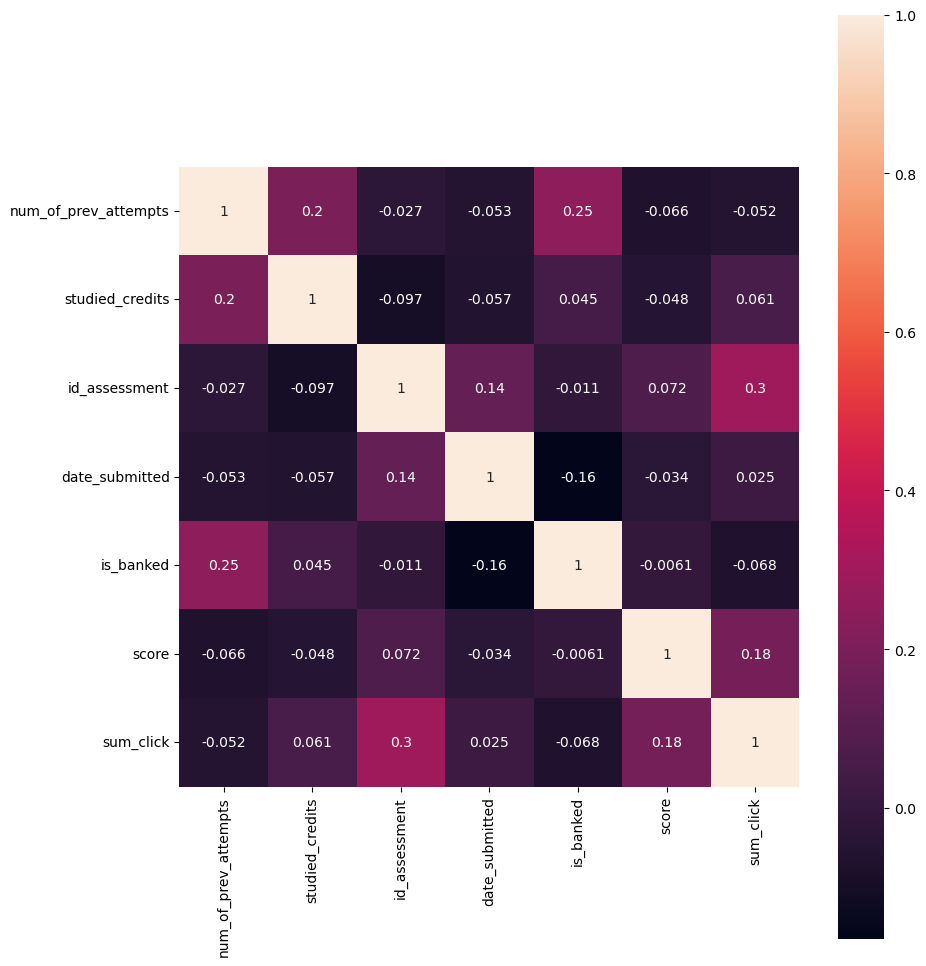

In [53]:
correlation = df_final.corr()
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(correlation, square=True, annot=True)
plt.show()

In [54]:
X = df_final.drop(['score'], axis=1)
y = df_final['score']

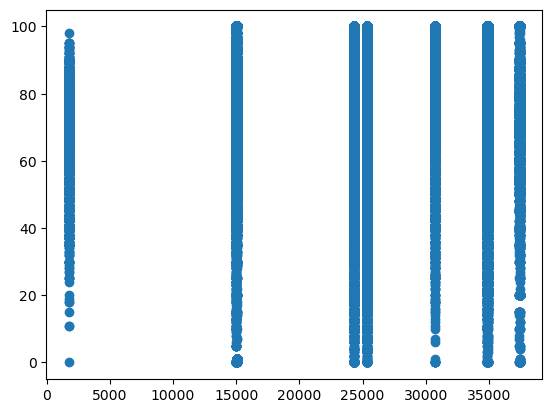

In [55]:
plt.scatter(X.id_assessment,y)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [62]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['code_module',
                                                                          'code_presentation',
                                                                          'gender',
                                                                          'region',
                           

In [63]:
grid.best_params_

{'decisiontreeregressor__max_depth': 50,
 'decisiontreeregressor__min_samples_split': 20}

In [64]:
grid.score(X_test,y_test)

0.23439423558217098

In [65]:
prediction = grid.predict(X_test)

In [66]:
from sklearn import metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, prediction)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

ValueError: Mix type of y not allowed, got types {'multiclass', 'continuous'}